#### Map plotting the chosen weather variables/parameters across the Chicago census (2020) tracts   
note: I will use the Chicago_Tracts_2020 shapefile instead of the one sent in the email as that only includes tracts from 2010.

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("cleaned_aggregated_data.csv")
df

In [ ]:
tracts = gpd.read_file("Chicago_Tracts_2020.zip")
tracts

,objectid,census_tra,census_t_1,tract_fips,tract_cent,tract_ce_1,tract_ce_2,tract_ce_3,tract_comm,tract_numa,tract_cens,perimeter,data_admin,tract_crea,date_tract,time_tract,shape_area,shape_len,geometry
0,1.0,720500,17031720500,17031,1.160172e+06,1.834962e+06,-87.689107,41.702834,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709,"POLYGON ((-87.69149 41.70636, -87.69148 41.706..."
1,2.0,730200,17031730200,17031,1.169816e+06,1.843710e+06,-87.653538,41.726636,73,113.0,2000.0,0.0,0.0,None,NaT,None,2.019934e+07,19738.525071,"POLYGON ((-87.64651 41.73253, -87.64656 41.732..."
2,3.0,730300,17031730300,17031,1.166814e+06,1.843978e+06,-87.664527,41.727436,73,22.0,2000.0,0.0,0.0,None,NaT,None,3.170253e+06,9848.214068,"POLYGON ((-87.66333 41.7212, -87.66345 41.7212..."
3,4.0,740100,17031740100,17031,1.157599e+06,1.832915e+06,-87.698582,41.697269,74,45.0,2000.0,0.0,0.0,None,NaT,None,9.690786e+06,18058.372253,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
4,5.0,710500,17031710500,17031,1.165054e+06,1.851289e+06,-87.670770,41.747534,71,33.0,2000.0,0.0,0.0,None,NaT,None,8.038190e+06,12094.288927,"POLYGON ((-87.66339 41.74848, -87.66335 41.746..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,871.0,500200,17031500200,17031,1.184485e+06,1.834448e+06,-87.600093,41.700889,50,28.0,2000.0,0.0,0.0,None,NaT,None,2.255428e+07,20304.368277,"POLYGON ((-87.59792 41.69306, -87.59804 41.692..."
874,872.0,390600,17031390600,17031,1.185725e+06,1.872771e+06,-87.594348,41.806022,39,12.0,2000.0,0.0,0.0,None,NaT,None,3.498344e+06,7870.626856,"POLYGON ((-87.59639 41.80237, -87.59671 41.802..."
875,877.0,400800,17031400800,17031,1.178649e+06,1.864272e+06,-87.620558,41.782863,40,15.0,2000.0,0.0,0.0,None,NaT,None,5.309753e+06,9299.146430,"POLYGON ((-87.61576 41.78555, -87.61575 41.785..."
876,873.0,010400,17031010400,17031,1.167496e+06,1.945048e+06,-87.659122,42.004765,1,20.0,2000.0,0.0,0.0,None,NaT,None,5.868951e+06,14845.153239,"POLYGON ((-87.65893 42.00976, -87.6589 42.0097..."


In [ ]:
## this is the variable I will use to identify each tract and its respective geometry
tracts["census_t_1"].head()

0    17031720500
1    17031730200
2    17031730300
3    17031740100
4    17031710500
Name: census_t_1, dtype: object

#### attempt to merge

In [ ]:
tracts.rename(columns={"census_t_1":"tract_id"}, inplace=True)
tracts

,objectid,census_tra,tract_id,tract_fips,tract_cent,tract_ce_1,tract_ce_2,tract_ce_3,tract_comm,tract_numa,tract_cens,perimeter,data_admin,tract_crea,date_tract,time_tract,shape_area,shape_len,geometry
0,1.0,720500,17031720500,17031,1.160172e+06,1.834962e+06,-87.689107,41.702834,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709,"POLYGON ((-87.69149 41.70636, -87.69148 41.706..."
1,2.0,730200,17031730200,17031,1.169816e+06,1.843710e+06,-87.653538,41.726636,73,113.0,2000.0,0.0,0.0,None,NaT,None,2.019934e+07,19738.525071,"POLYGON ((-87.64651 41.73253, -87.64656 41.732..."
2,3.0,730300,17031730300,17031,1.166814e+06,1.843978e+06,-87.664527,41.727436,73,22.0,2000.0,0.0,0.0,None,NaT,None,3.170253e+06,9848.214068,"POLYGON ((-87.66333 41.7212, -87.66345 41.7212..."
3,4.0,740100,17031740100,17031,1.157599e+06,1.832915e+06,-87.698582,41.697269,74,45.0,2000.0,0.0,0.0,None,NaT,None,9.690786e+06,18058.372253,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
4,5.0,710500,17031710500,17031,1.165054e+06,1.851289e+06,-87.670770,41.747534,71,33.0,2000.0,0.0,0.0,None,NaT,None,8.038190e+06,12094.288927,"POLYGON ((-87.66339 41.74848, -87.66335 41.746..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,871.0,500200,17031500200,17031,1.184485e+06,1.834448e+06,-87.600093,41.700889,50,28.0,2000.0,0.0,0.0,None,NaT,None,2.255428e+07,20304.368277,"POLYGON ((-87.59792 41.69306, -87.59804 41.692..."
874,872.0,390600,17031390600,17031,1.185725e+06,1.872771e+06,-87.594348,41.806022,39,12.0,2000.0,0.0,0.0,None,NaT,None,3.498344e+06,7870.626856,"POLYGON ((-87.59639 41.80237, -87.59671 41.802..."
875,877.0,400800,17031400800,17031,1.178649e+06,1.864272e+06,-87.620558,41.782863,40,15.0,2000.0,0.0,0.0,None,NaT,None,5.309753e+06,9299.146430,"POLYGON ((-87.61576 41.78555, -87.61575 41.785..."
876,873.0,010400,17031010400,17031,1.167496e+06,1.945048e+06,-87.659122,42.004765,1,20.0,2000.0,0.0,0.0,None,NaT,None,5.868951e+06,14845.153239,"POLYGON ((-87.65893 42.00976, -87.6589 42.0097..."


In [ ]:
type(tracts["tract_id"][0])

str

In [ ]:
type(df["tract_id"][0])

numpy.int64

In [ ]:
tracts["tract_id"] = tracts["tract_id"].astype(np.int64)
type(df["tract_id"][0])

numpy.int64

In [ ]:
# I will just create a new dataframe combining the cleaned data and the geometry col from tracts df 
df_merged = df.merge(tracts, on="tract_id", how="inner")
df_merged

,cleaned_time,tract_id,cloud_cover,visibility,relative_humidity_2m,precipitation,wind_speed_180m,wind_direction_180m,temperature_180m,surface_pressure,...,tract_numa,tract_cens,perimeter,data_admin,tract_crea,date_tract,time_tract,shape_area,shape_len,geometry
0,2025-07-09,17031010100,29.333333,48296.697375,87.666667,0.0000,9.054167,157.583333,70.212500,994.116667,...,17.0,2000.0,0.0,0.0,None,NaT,None,3.968182e+06,9315.795124,"POLYGON ((-87.6642 42.02126, -87.66419 42.0212..."
1,2025-07-09,17031010300,29.333333,48296.697375,87.666667,0.0000,9.054167,157.583333,70.212500,994.116667,...,26.0,2000.0,0.0,0.0,None,NaT,None,5.075522e+06,10056.022254,"POLYGON ((-87.66825 42.01937, -87.66824 42.019..."
2,2025-07-09,17031010400,35.041667,46751.968458,89.625000,0.0000,9.054167,157.583333,70.366667,995.354167,...,20.0,2000.0,0.0,0.0,None,NaT,None,5.868951e+06,14845.153239,"POLYGON ((-87.65893 42.00976, -87.6589 42.0097..."
3,2025-07-09,17031010600,29.333333,48296.697375,87.666667,0.0000,9.054167,157.583333,70.250000,994.350000,...,33.0,2000.0,0.0,0.0,None,NaT,None,5.328196e+06,13409.109786,"POLYGON ((-87.66568 42.00362, -87.66568 42.003..."
4,2025-07-09,17031020100,28.958333,48966.535125,87.875000,0.0000,9.620833,161.333333,69.033333,993.429167,...,13.0,2000.0,0.0,0.0,None,NaT,None,4.426978e+06,8789.046583,"POLYGON ((-87.68838 42.01952, -87.68789 42.019..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,2025-07-15,17031811600,55.250000,73187.337417,71.208333,0.0030,19.383333,205.208333,75.179167,992.425000,...,1.0,2000.0,0.0,0.0,None,NaT,None,1.596659e+05,2783.466961,"POLYGON ((-87.88436 41.95746, -87.88424 41.957..."
3895,2025-07-15,17031820800,63.000000,74237.206375,69.916667,0.0015,18.945833,203.708333,75.175000,994.529167,...,1.0,2000.0,0.0,0.0,None,NaT,None,5.841060e+04,2088.911156,"POLYGON ((-87.80155 41.79766, -87.80162 41.797..."
3896,2025-07-15,17031821500,68.125000,74237.206375,69.166667,0.0015,19.362500,201.625000,75.575000,994.070833,...,2.0,2000.0,0.0,0.0,None,NaT,None,1.760960e+05,2103.504198,"POLYGON ((-87.61724 41.65039, -87.61723 41.650..."
3897,2025-07-15,17031823304,68.125000,74237.206375,69.166667,0.0015,19.141667,202.541667,75.237500,993.729167,...,2.0,2000.0,0.0,0.0,None,NaT,None,7.019098e+06,13294.340447,"POLYGON ((-87.69096 41.692, -87.69094 41.69169..."


This number below should be at least 868.

In [ ]:
len(df_merged["tract_id"].unique())

557

In [ ]:
old_tracts = gpd.read_file("Chicago_Tracts_2010.zip")
old_tracts

,statefp10,countyfp10,tractce10,geoid10,name10,namelsad10,commarea,commarea_n,notes,geometry
0,17,031,842400,17031842400,8424,Census Tract 8424,44,44.0,None,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,17,031,840300,17031840300,8403,Census Tract 8403,59,59.0,None,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,17,031,841100,17031841100,8411,Census Tract 8411,34,34.0,None,"POLYGON ((-87.62935 41.8528, -87.62934 41.8525..."
3,17,031,841200,17031841200,8412,Census Tract 8412,31,31.0,None,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,17,031,839000,17031839000,8390,Census Tract 8390,32,32.0,None,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...,...
796,17,031,070400,17031070400,704,Census Tract 704,7,7.0,None,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,17,031,070500,17031070500,705,Census Tract 705,7,7.0,None,"POLYGON ((-87.66349 41.93036, -87.6635 41.9306..."
798,17,031,130300,17031130300,1303,Census Tract 1303,13,13.0,None,"POLYGON ((-87.71436 41.983, -87.71472 41.98299..."
799,17,031,292200,17031292200,2922,Census Tract 2922,29,29.0,None,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [ ]:
old_tracts.dtypes

statefp10       object
countyfp10      object
tractce10       object
geoid10         object
name10          object
namelsad10      object
commarea        object
commarea_n     float64
notes           object
geometry      geometry
dtype: object

In [ ]:
old_tracts.rename(columns={"geoid10":"tract_id"}, inplace=True)
old_tracts["tract_id"] = old_tracts["tract_id"].astype(np.int64)
type(df["tract_id"][0])

numpy.int64

In [ ]:
old_tracts.dtypes

statefp10       object
countyfp10      object
tractce10       object
tract_id         int64
name10          object
namelsad10      object
commarea        object
commarea_n     float64
notes           object
geometry      geometry
dtype: object

In [ ]:
len(df_merged["tract_id"].unique())

557

#### Note: after noticing some missing gemoetries with Chicago_Tracts_2020.zip and the 2010 census tracts, I decided to use the original Tiger Illinois Tracts with 2020 data. 

In [ ]:
tracts = gpd.read_file("Tiger_Illinois_Tracts_2020.zip")  
chicago_tracts_raw = gpd.read_file("Chicago_Tracts_2020.zip")
chicago_boundary = chicago_tracts_raw.dissolve()
tracts = tracts.to_crs(chicago_boundary.crs)
chicago_tracts = gpd.sjoin(tracts, chicago_boundary, how="inner", predicate="intersects")

# this is the dataframe containing the ~866 Chicago tract geometries
chicago_tracts.geometry

0       POLYGON ((-87.58745 41.72327, -87.58699 41.723...
1       POLYGON ((-87.54292 41.72391, -87.54276 41.724...
5       POLYGON ((-87.6704 41.83045, -87.67015 41.8304...
6       POLYGON ((-87.64645 41.84533, -87.64621 41.845...
13      POLYGON ((-87.74918 41.85127, -87.74868 41.851...
                              ...                        
3207    POLYGON ((-87.74322 41.80762, -87.74316 41.807...
3208    POLYGON ((-87.6633 41.74489, -87.66306 41.7449...
3211    POLYGON ((-87.54958 41.65143, -87.54958 41.651...
3236    POLYGON ((-87.66172 41.87211, -87.6612 41.8721...
3237    POLYGON ((-87.83663 41.97532, -87.83662 41.975...
Name: geometry, Length: 868, dtype: geometry

In [ ]:
chicago_tracts.rename(columns={"GEOID":"tract_id"}, inplace=True)
chicago_tracts["tract_id"] = chicago_tracts["tract_id"].astype(np.int64)

In [ ]:
## merge weather data with chicago_tracts and keep only relevant columns
df_merged = df.merge(chicago_tracts, on="tract_id", how="inner")
df_merged.head()

,cleaned_time,tract_id,cloud_cover,visibility,relative_humidity_2m,precipitation,wind_speed_180m,wind_direction_180m,temperature_180m,surface_pressure,...,tract_comm,tract_numa,tract_cens,perimeter,data_admin,tract_crea,date_tract,time_tract,shape_area,shape_len
0,2025-07-09,17031010100,29.333333,48296.697375,87.666667,0.0,9.054167,157.583333,70.212500,994.116667,...,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709
1,2025-07-09,17031010201,28.958333,48966.535125,87.875000,0.0,9.620833,161.333333,69.062500,993.770833,...,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709
2,2025-07-09,17031010202,29.333333,48296.697375,87.666667,0.0,9.054167,157.583333,70.250000,994.229167,...,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709
3,2025-07-09,17031010300,29.333333,48296.697375,87.666667,0.0,9.054167,157.583333,70.212500,994.116667,...,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709
4,2025-07-09,17031010400,35.041667,46751.968458,89.625000,0.0,9.054167,157.583333,70.366667,995.354167,...,72,36.0,2000.0,0.0,0.0,None,NaT,None,1.122820e+07,14047.050709


In [ ]:
df_merged.columns

Index(['cleaned_time', 'tract_id', 'cloud_cover', 'visibility',
       'relative_humidity_2m', 'precipitation', 'wind_speed_180m',
       'wind_direction_180m', 'temperature_180m', 'surface_pressure',
       'STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'index_right', 'objectid', 'census_tra', 'census_t_1', 'tract_fips',
       'tract_cent', 'tract_ce_1', 'tract_ce_2', 'tract_ce_3', 'tract_comm',
       'tract_numa', 'tract_cens', 'perimeter', 'data_admin', 'tract_crea',
       'date_tract', 'time_tract', 'shape_area', 'shape_len'],
      dtype='object')

In [1]:
df_merged = df_merged[['cleaned_time','tract_id', 'cloud_cover', 'visibility',
       'relative_humidity_2m', 'precipitation', 'wind_speed_180m',
       'wind_direction_180m', 'temperature_180m', 'surface_pressure','geometry']]
df_merged # this looks good now

NameError: name 'df_merged' is not defined

In [321]:
# now just convert to a geodataframe
gdf = gpd.GeoDataFrame(df_merged, geometry="geometry")
print(type(gdf))
print(gdf.crs) # 4326 is the world crs with lat and lon 

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4326


In [322]:
## projecting to crs 26916 for correct area calculation (will need to delete lake geometry)

gdf = gdf.to_crs("EPSG:26916")

### Generate a map for each weather variable (8 total) for each of the 7 days:

In [323]:
# first I will separate each day of the week into a separate dataframe to make it easier to create the maps.
# each dataframe should be 868 rows (6076 / (24 hrs * 7 days))
days_of_week = sorted(gdf["cleaned_time"].unique())
days_of_week

['2025-07-09',
 '2025-07-10',
 '2025-07-11',
 '2025-07-12',
 '2025-07-13',
 '2025-07-14',
 '2025-07-15']

In [324]:
day_1 = gdf[gdf["cleaned_time"]==days_of_week[0]]
day_2 = gdf[gdf["cleaned_time"]==days_of_week[1]]
day_3 = gdf[gdf["cleaned_time"]==days_of_week[2]]
day_4 = gdf[gdf["cleaned_time"]==days_of_week[3]]
day_5 = gdf[gdf["cleaned_time"]==days_of_week[4]]
day_6 = gdf[gdf["cleaned_time"]==days_of_week[5]]
day_7 = gdf[gdf["cleaned_time"]==days_of_week[6]]


In [325]:
day_1

,cleaned_time,tract_id,cloud_cover,visibility,relative_humidity_2m,precipitation,wind_speed_180m,wind_direction_180m,temperature_180m,surface_pressure,geometry
0,2025-07-09,17031010100,29.333333,48296.697375,87.666667,0.000000,9.054167,157.583333,70.212500,994.116667,"POLYGON ((443936.001 4652545.254, 444012.353 4..."
1,2025-07-09,17031010201,28.958333,48966.535125,87.875000,0.000000,9.620833,161.333333,69.062500,993.770833,"POLYGON ((443315.826 4652166.333, 443343.64 46..."
2,2025-07-09,17031010202,29.333333,48296.697375,87.666667,0.000000,9.054167,157.583333,70.250000,994.229167,"POLYGON ((443963.45 4652152.965, 443970.487 46..."
3,2025-07-09,17031010300,29.333333,48296.697375,87.666667,0.000000,9.054167,157.583333,70.212500,994.116667,"POLYGON ((444418.78 4652145.271, 444428.548 46..."
4,2025-07-09,17031010400,35.041667,46751.968458,89.625000,0.000000,9.054167,157.583333,70.366667,995.354167,"POLYGON ((445065.309 4651413.606, 445085.185 4..."
...,...,...,...,...,...,...,...,...,...,...,...
863,2025-07-09,17031844700,42.708333,49253.609000,86.791667,0.000500,9.054167,157.583333,70.250000,994.383333,"POLYGON ((440242.767 4633670.595, 440242.903 4..."
864,2025-07-09,17031980000,25.333333,54926.728542,83.958333,0.012125,9.558333,157.083333,70.112500,992.625000,"POLYGON ((422139.353 4651000.086, 422145.457 4..."
865,2025-07-09,17031980100,52.416667,50032.808542,86.958333,0.000000,8.725000,185.083333,71.050000,994.283333,"POLYGON ((436663.296 4627045.161, 436683.572 4..."
866,2025-07-09,17031990000,45.333333,50948.709708,88.375000,0.001167,10.662500,144.791667,67.000000,995.354167,"POLYGON ((438732.981 4667055.052, 440369.031 4..."


The lake is taking up a big portion of the map, so I am going to remove it.

In [326]:
# DO NOT RUN MULTIPLE TIMES

day_1 = day_1[day_1.area != day_1.area.max()]
day_2 = day_2[day_2.area != day_2.area.max()]
day_3 = day_3[day_3.area != day_3.area.max()]
day_4 = day_4[day_4.area != day_4.area.max()]
day_5 = day_5[day_5.area != day_5.area.max()]
day_6 = day_6[day_6.area != day_6.area.max()]
day_7 = day_7[day_7.area != day_7.area.max()]

In [327]:
# now that the river has been deleted from each day, I revert back to the lat and lon system for the maps:

day_1 = day_1.to_crs("EPSG:4326")
day_2 = day_2.to_crs("EPSG:4326")
day_3 = day_3.to_crs("EPSG:4326")
day_4 = day_4.to_crs("EPSG:4326")
day_5 = day_5.to_crs("EPSG:4326")
day_6 = day_6.to_crs("EPSG:4326")
day_7 = day_7.to_crs("EPSG:4326")

#### testing out map config

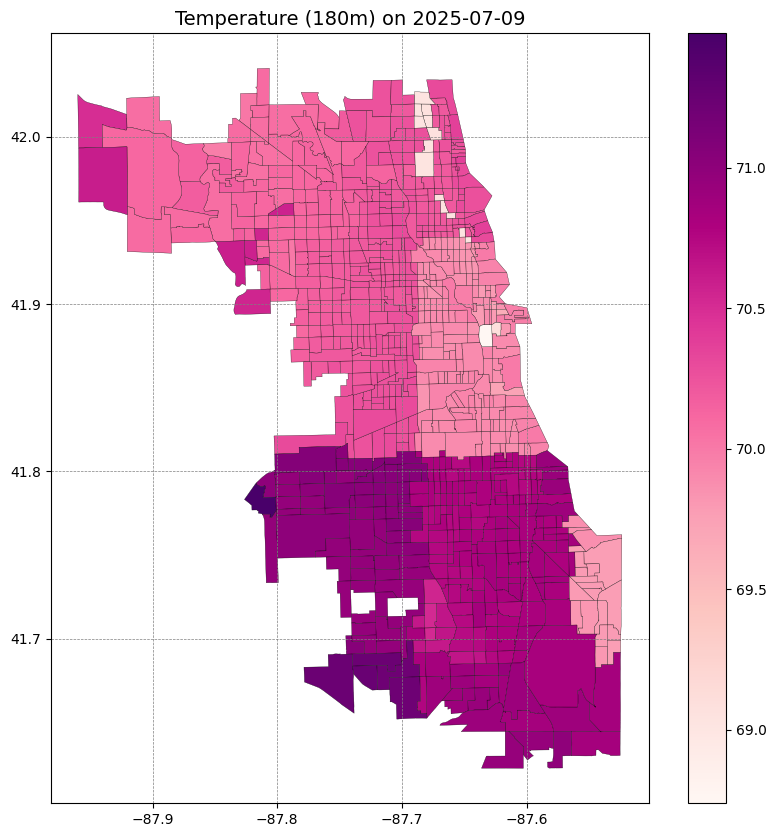

In [328]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(color='gray', linestyle='--', linewidth=0.5)

day_1.plot(
    column="temperature_180m",
    cmap="RdPu",
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.2
)

ax.set_title("Temperature (180m) on 2025-07-09", fontsize=14)
plt.show()

In [329]:
test_path = os.path.join("weather var maps/", "test.png")

Text(0.5, 1.0, 'Temperature (180m) on 2025-07-09')

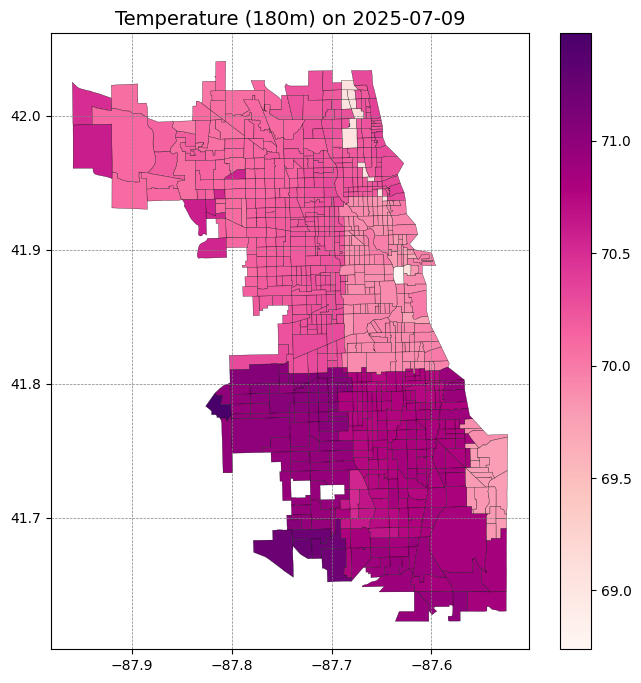

In [330]:
# good to go now, just reducing size.
fig, ax = plt.subplots(figsize=(8, 8))
plt.grid(color='gray', linestyle='--', linewidth=0.5) 

day_1.plot(
    column="temperature_180m",
    cmap="RdPu",
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.2
)

ax.set_title("Temperature (180m) on 2025-07-09", fontsize=14)

#### Loop for all maps:

In [331]:
day_1.columns

Index(['cleaned_time', 'tract_id', 'cloud_cover', 'visibility',
       'relative_humidity_2m', 'precipitation', 'wind_speed_180m',
       'wind_direction_180m', 'temperature_180m', 'surface_pressure',
       'geometry'],
      dtype='object')

In [332]:
weather_vars = ['cloud_cover', 'visibility',
       'relative_humidity_2m', 'precipitation', 'wind_speed_180m',
       'wind_direction_180m', 'temperature_180m', 'surface_pressure']

In [ ]:
week_forecast = [day_1, day_2, day_3, day_4, day_5, day_6, day_7]

In [296]:
for day in week_forecast:
    for var in weather_vars: 
        fig, ax = plt.subplots(figsize=(8, 8))
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        
        day = day.reset_index(drop=True) # to prevent keyerror
        title = f"{var} on {day.cleaned_time[0]}"
        ax.set_title(title, fontsize=14)

        day.plot(
            column=var,
            cmap="RdPu",
            legend=True,
            ax=ax,
            edgecolor="black",
            linewidth=0.2
        )

        folder_name = os.path.join("weather_var_maps", var)
        os.makedirs(folder_name, exist_ok=True)
        path = os.path.join(folder_name, f"{title}.png")

        plt.savefig(path)
        plt.close(fig)


#### just saving the cleaned data again since I made some changes to its properties:

In [333]:
gdf = gdf.to_crs("EPSG:4326")

In [334]:
gdf.to_csv("cleaned_aggregated_data_NEW.csv", index=False)